<a href="https://colab.research.google.com/github/saiteja1522/books-app/blob/main/book_recommend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# Load the datasets
ratings = pd.read_csv("Ratings.csv")
users = pd.read_csv("Users.csv")
books = pd.read_csv("Books.csv")

<ipython-input-6-e30930f22030>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


In [7]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [8]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [9]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [10]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [11]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [12]:
users.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


In [13]:
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [14]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [16]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [17]:
# Merge datasets
ratings_users = pd.merge(ratings, users, on='User-ID', how='left')
combine_data = pd.merge(ratings_users, books, on='ISBN', how='left')

In [18]:
combine_data

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,"seattle, washington, usa",NaN,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,"h, new south wales, australia",16.0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,"rijeka, n/a, croatia",16.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,"cedar park, texas, usa",NaN,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1149776,276706,0679447156,0,"quebec, quebec, canada",18.0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1149777,276709,0515107662,10,"mannington, west virginia, usa",38.0,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...
1149778,276721,0590442449,10,"providence, rhode island, usa",14.0,Fourth Grade Rats,Jerry Spinelli,1996,Scholastic,http://images.amazon.com/images/P/0590442449.0...,http://images.amazon.com/images/P/0590442449.0...,http://images.amazon.com/images/P/0590442449.0...


In [19]:
combine_data.describe()

,User-ID,Book-Rating,Age
count,1.149780e+06,1.149780e+06,840288.000000
mean,1.403864e+05,2.866950e+00,37.239724
std,8.056228e+04,3.854184e+00,14.246676
min,2.000000e+00,0.000000e+00,0.000000
25%,7.034500e+04,0.000000e+00,28.000000
50%,1.410100e+05,0.000000e+00,35.000000
75%,2.110280e+05,7.000000e+00,45.000000
max,2.788540e+05,1.000000e+01,244.000000


In [20]:
# ▸ drop image-URL columns (not useful for modeling)
img_cols = [c for c in combine_data.columns if "Image-URL" in c]
combine_data.drop(columns=img_cols, inplace=True)


In [21]:
# ▸ age: keep reasonable values (5 – 100); replace others with median
# Changed 'df' to 'combine_data' to apply the operations on the correct DataFrame
combine_data["Age"] = combine_data["Age"].mask(~combine_data["Age"].between(5, 100))
combine_data["Age"].fillna(combine_data["Age"].median(), inplace=True)

<ipython-input-21-493fcb59f0e5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combine_data["Age"].fillna(combine_data["Age"].median(), inplace=True)


In [22]:
# ▸ year of publication: fix obvious errors and cast to int
combine_data["Year-Of-Publication"] = pd.to_numeric(combine_data["Year-Of-Publication"], errors="coerce")
median_year = int(combine_data["Year-Of-Publication"].median())
combine_data["Year-Of-Publication"].fillna(median_year, inplace=True)
combine_data["Year-Of-Publication"] = combine_data["Year-Of-Publication"].astype(int)

<ipython-input-22-36494897aa12>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combine_data["Year-Of-Publication"].fillna(median_year, inplace=True)


In [23]:
# ▸ ratings: many are 0 (means “unrated”).  We’ll drop unrated rows for supervised tasks
# Changed 'df' to 'combine_data' to filter the correct DataFrame
combine_data = combine_data[combine_data["Book-Rating"] > 0]

# The following line still uses 'df', which will cause a NameError.
# It seems the intention was to print the missing value percentages of the filtered dataframe.
# Change 'df' to 'combine_data' here as well.
# print(df.isna().mean().sort_values(ascending=False).head())

# Corrected line to print the missing value percentages of the filtered dataframe
print(combine_data.isna().mean().sort_values(ascending=False).head())

Publisher      0.114905
Book-Author    0.114905
Book-Title     0.114900
User-ID        0.000000
ISBN           0.000000
dtype: float64


In [24]:
# Remove rows with missing critical book information
combine_data.dropna(subset=["Book-Title", "Book-Author", "Publisher"], inplace=True)

<ipython-input-24-26e6703dca04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_data.dropna(subset=["Book-Title", "Book-Author", "Publisher"], inplace=True)


In [25]:
print(f"New shape after dropping null book info: {combine_data.shape}")

New shape after dropping null book info: (383838, 9)


In [26]:
combine_data.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Location,0
Age,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0


In [27]:
# Capping Age outliers at 5th and 95th percentiles
q_low, q_high = combine_data["Age"].quantile([0.05, 0.95])
combine_data["Age"] = combine_data["Age"].clip(lower=q_low, upper=q_high)
combine_data["Year-Of-Publication"] = combine_data["Year-Of-Publication"].mask(
    ~combine_data["Year-Of-Publication"].between(1900, 2025)
)
# Capping Age outliers at 5th and 95th percentiles
q_low, q_high = combine_data["Age"].quantile([0.05, 0.95])
combine_data["Age"] = combine_data["Age"].clip(lower=q_low, upper=q_high)
combine_data["Year-Of-Publication"] = combine_data["Year-Of-Publication"].mask(
    ~combine_data["Year-Of-Publication"].between(1900, 2025)
)
combine_data["Year-Of-Publication"].fillna(combine_data["Year-Of-Publication"].median(), inplace=True)

<ipython-input-27-a645b4c0dc9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_data["Age"] = combine_data["Age"].clip(lower=q_low, upper=q_high)
<ipython-input-27-a645b4c0dc9d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_data["Year-Of-Publication"] = combine_data["Year-Of-Publication"].mask(
<ipython-input-27-a645b4c0dc9d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

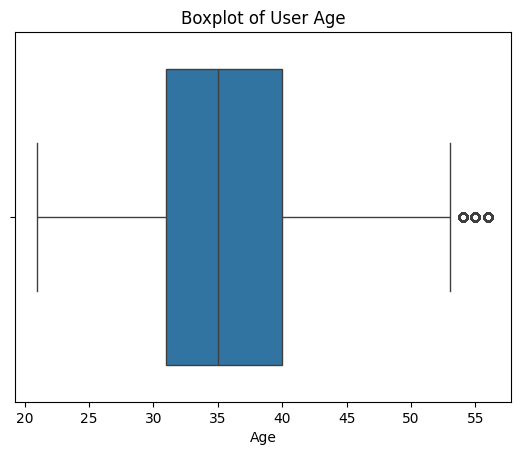

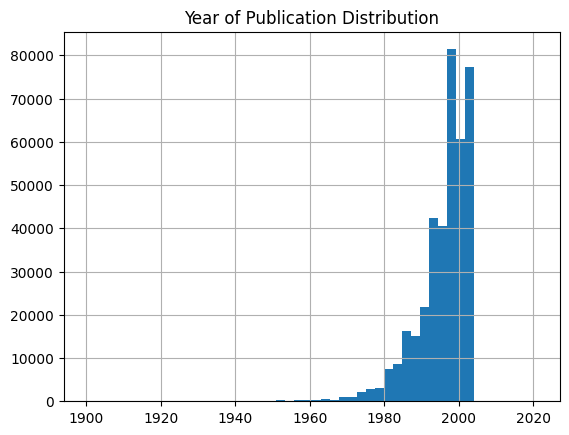

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Age
# Changed 'df' to 'combine_data'
sns.boxplot(x=combine_data["Age"])
plt.title("Boxplot of User Age")
plt.show()

# Histogram for Year-Of-Publication
# Changed 'df' to 'combine_data'
combine_data["Year-Of-Publication"].hist(bins=50)
plt.title("Year of Publication Distribution")
plt.show()


In [29]:
combine_data.duplicated().any()

np.False_

In [30]:
ratings['Book-Rating'].value_counts().sort_index()

,count
Book-Rating,
0,716109
1,1770
2,2759
3,5996
4,8904
5,50974
6,36924
7,76457
8,103736


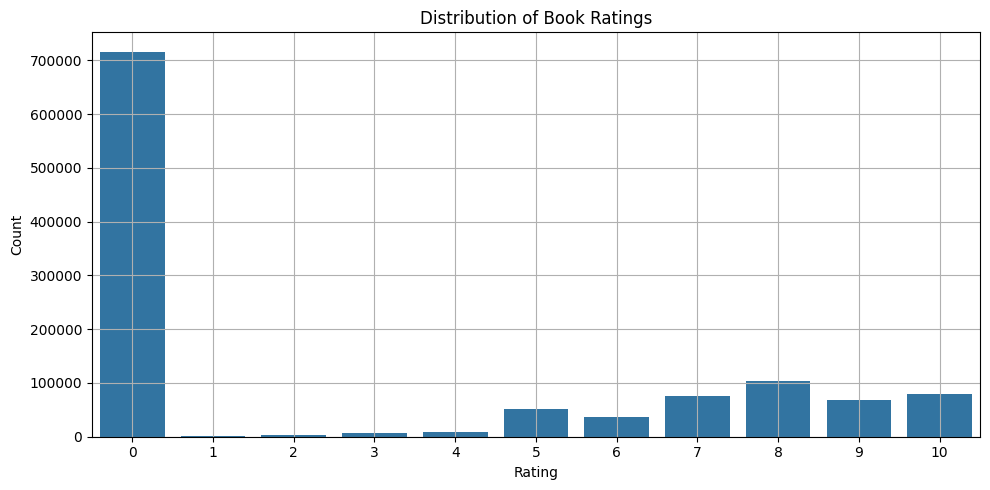

In [31]:
# Plot distribution of ratings
plt.figure(figsize=(10, 5))
sns.countplot(data=ratings, x='Book-Rating')
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
# Filter out implicit ratings (rating = 0)
explicit_ratings = combine_data[combine_data['Book-Rating'] > 0]

In [33]:
explicit_ratings

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
1,276726,0155061224,5,"seattle, washington, usa",35.0,Rites of Passage,Judith Rae,2001.0,Heinle
3,276729,052165615X,3,"rijeka, n/a, croatia",21.0,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,"rijeka, n/a, croatia",21.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
8,276744,038550120X,7,"torrance, california, usa",35.0,A Painted House,JOHN GRISHAM,2001.0,Doubleday
16,276747,0060517794,9,"iowa city, iowa, usa",25.0,Little Altars Everywhere,Rebecca Wells,2003.0,HarperTorch
...,...,...,...,...,...,...,...,...,...
1149771,276704,0743211383,7,"cedar park, texas, usa",35.0,Dreamcatcher,Stephen King,2001.0,Scribner
1149773,276704,0806917695,5,"cedar park, texas, usa",35.0,Perplexing Lateral Thinking Puzzles: Scholasti...,Paul Sloane,1997.0,Sterling Publishing
1149775,276704,1563526298,9,"cedar park, texas, usa",35.0,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149777,276709,0515107662,10,"mannington, west virginia, usa",38.0,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books


In [34]:
# Most rated books (by number of ratings)
most_rated_books = (
    explicit_ratings.groupby(['Book-Title'])['Book-Rating']
    .count()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name='Number of Ratings')
)

In [35]:
most_rated_books

,Book-Title,Number of Ratings
0,The Lovely Bones: A Novel,707
1,Wild Animus,581
2,The Da Vinci Code,494
3,The Secret Life of Bees,406
4,The Nanny Diaries: A Novel,393
5,The Red Tent (Bestselling Backlist),383
6,Bridget Jones's Diary,377
7,A Painted House,366
8,Life of Pi,336
9,Harry Potter and the Chamber of Secrets (Book 2),326


<ipython-input-36-e867cd5e3c22>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Ratings', y='Book-Title', data=most_rated_books, palette='magma')


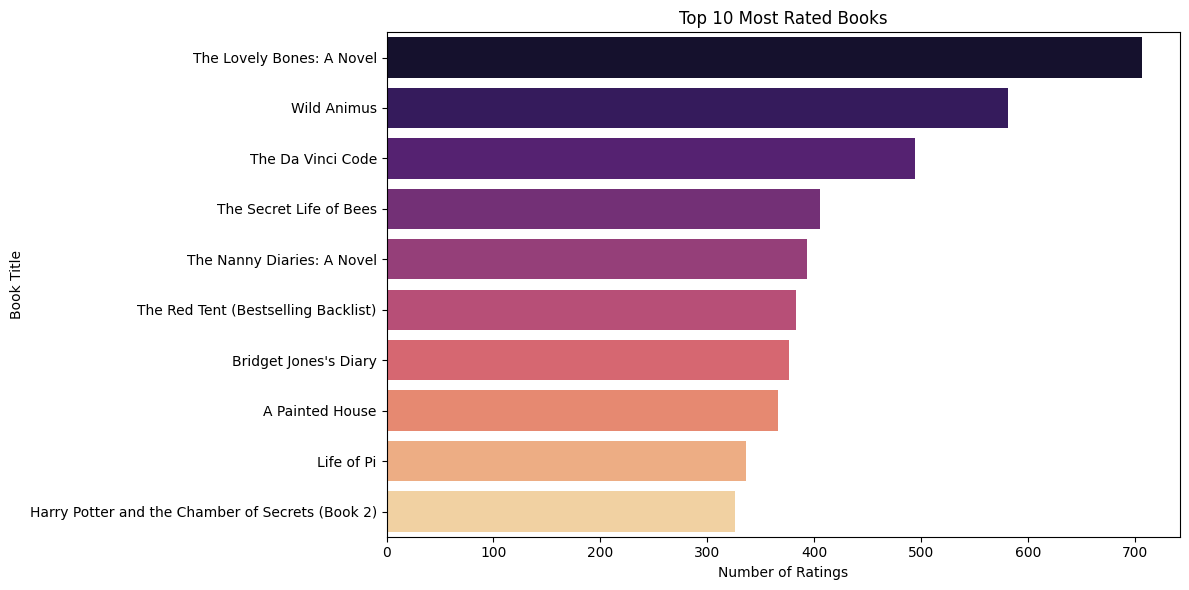

In [36]:
# Plot: Top 10 most rated books
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Ratings', y='Book-Title', data=most_rated_books, palette='magma')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()

In [37]:
# Top rated books (by average rating, with at least 50 ratings)
top_rated_books = (
    explicit_ratings.groupby('Book-Title')
    .agg({'Book-Rating': ['mean', 'count']})
)
top_rated_books.columns = ['Average Rating', 'Rating Count']
top_rated_books = top_rated_books[top_rated_books['Rating Count'] >= 50]
top_rated_books = top_rated_books.sort_values(by='Average Rating', ascending=False).head(10).reset_index()

In [38]:
top_rated_books

,Book-Title,Average Rating,Rating Count
0,"The Two Towers (The Lord of the Rings, Part 2)",9.330882,136
1,"The Return of the King (The Lord of the Rings,...",9.213592,103
2,Harry Potter and the Goblet of Fire (Book 4),9.125506,247
3,The Hobbit,9.120000,50
4,The Little Prince,9.111111,90
5,Charlotte's Web (Trophy Newbery),9.073529,68
6,Harry Potter and the Sorcerer's Stone (Book 1),9.062500,176
7,84 Charing Cross Road,9.049180,61
8,Harry Potter and the Order of the Phoenix (Boo...,9.047393,211
9,Harry Potter and the Prisoner of Azkaban (Book 3),9.043321,277


<ipython-input-39-c79b0b086b02>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Rating', y='Book-Title', data=top_rated_books, palette='coolwarm')


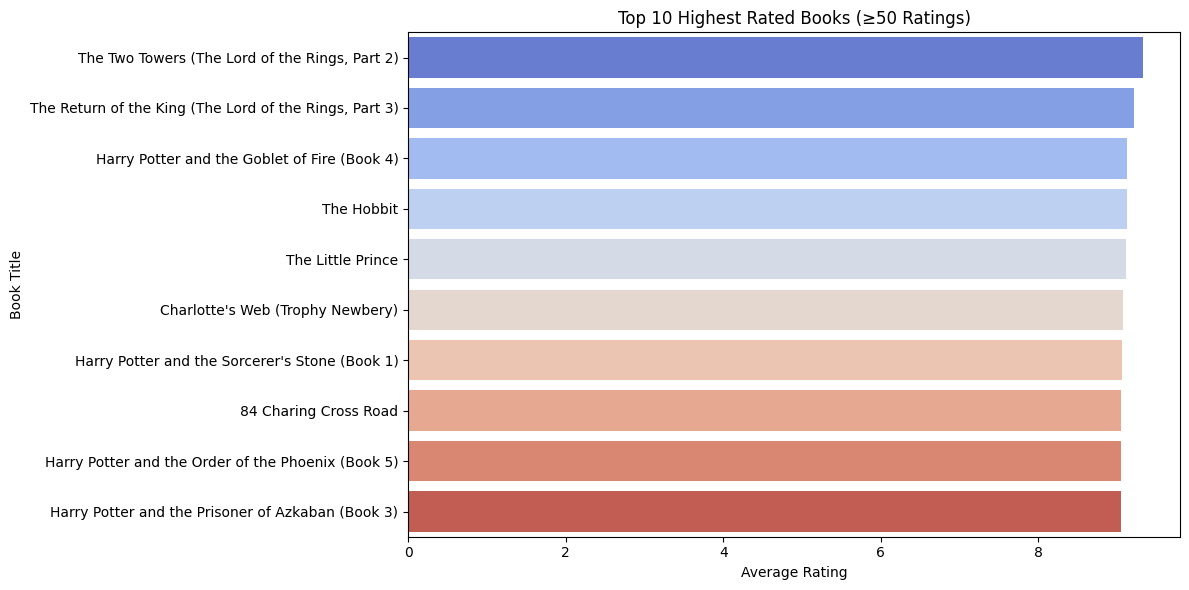

In [39]:
# Plot: Top 10 highest rated books (with at least 50 ratings)
plt.figure(figsize=(12, 6))
sns.barplot(x='Average Rating', y='Book-Title', data=top_rated_books, palette='coolwarm')
plt.title('Top 10 Highest Rated Books (≥50 Ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()

In [40]:
combine_data.columns= combine_data.columns.str.strip()

In [41]:
combine_data.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Location', 'Age', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher'],
      dtype='object')

In [42]:
combine_data.describe()

,User-ID,Book-Rating,Age,Year-Of-Publication
count,383838.000000,383838.000000,383838.000000,383838.000000
mean,136031.943190,7.626686,36.047554,1995.740278
std,80482.565625,1.841342,9.060961,7.243365
min,8.000000,1.000000,21.000000,1900.000000
25%,67591.000000,7.000000,31.000000,1993.000000
50%,133790.000000,8.000000,35.000000,1998.000000
75%,206219.000000,9.000000,40.000000,2001.000000
max,278854.000000,10.000000,56.000000,2021.000000


In [43]:
combine_data.describe(include='object')

,ISBN,Location,Book-Title,Book-Author,Publisher
count,383838,383838,383838,383838,383838
unique,149832,18368,135564,62111,11574
top,0316666343,"n/a, n/a, n/a",The Lovely Bones: A Novel,Stephen King,Ballantine Books
freq,707,6948,707,4639,12781


<ipython-input-44-4814d44b5ffd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=user_activity, x='ActivityLevel', palette='Set2')


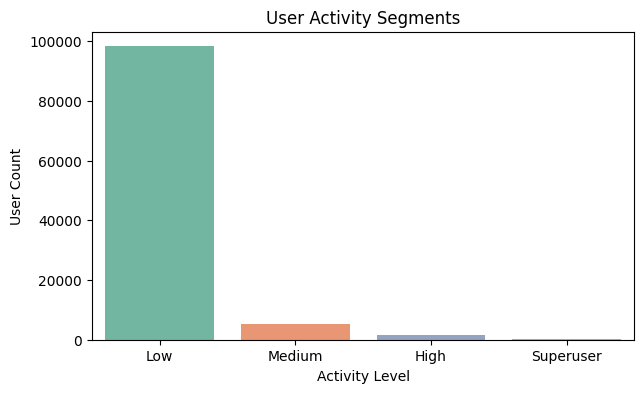

In [44]:
user_activity = ratings.groupby('User-ID').size().reset_index(name='RatingCount')
user_activity['ActivityLevel'] = pd.cut(user_activity['RatingCount'],
                                        bins=[0, 20, 100, 500, 10000],
                                        labels=['Low', 'Medium', 'High', 'Superuser'])

plt.figure(figsize=(7, 4))
sns.countplot(data=user_activity, x='ActivityLevel', palette='Set2')
plt.title("User Activity Segments")
plt.xlabel("Activity Level")
plt.ylabel("User Count")
plt.show()

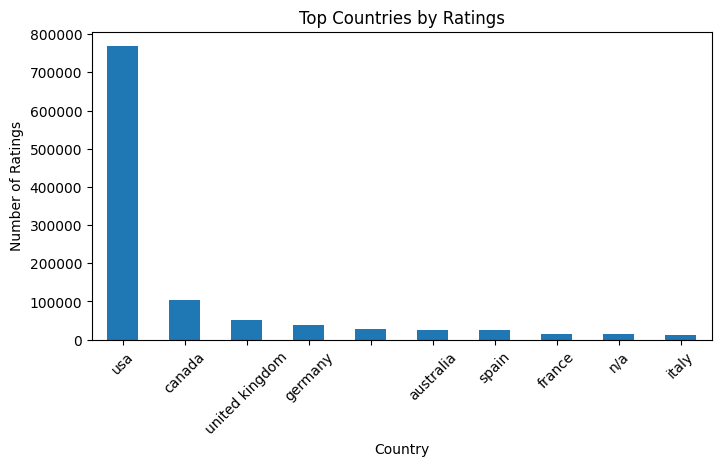

In [45]:
# Extract country from location
users['Country'] = users['Location'].apply(lambda x: x.split(',')[-1].strip() if pd.notnull(x) else 'Unknown')
ratings_users_country = ratings.merge(users[['User-ID', 'Country']], on='User-ID')
top_countries = ratings_users_country['Country'].value_counts().head(10)

top_countries.plot(kind='bar', figsize=(8, 4), title='Top Countries by Ratings')
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.show()

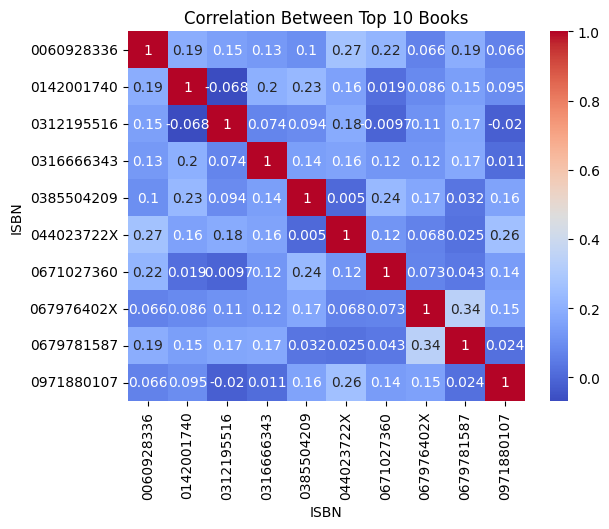

In [46]:
# Pivot for top N books
top_books = ratings['ISBN'].value_counts().head(10).index
corr_matrix = ratings[ratings['ISBN'].isin(top_books)].pivot_table(index='User-ID', columns='ISBN', values='Book-Rating')

# Drop NaNs and plot correlation
corr_matrix = corr_matrix.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Top 10 Books")
plt.show()

<ipython-input-47-750c950356cf>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Keyword', x='Frequency', data=common_keywords, palette='viridis')


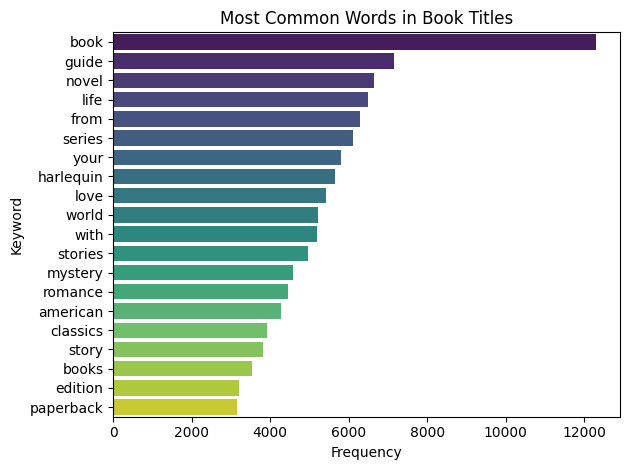

In [47]:
## Title Keyword Frequency
from collections import Counter
import re

titles = books['Book-Title'].dropna().str.lower()
keywords = []

for title in titles:
    words = re.findall(r'\b[a-z]{4,}\b', title)
    keywords.extend(words)

keyword_counts = Counter(keywords)
common_keywords = pd.DataFrame(keyword_counts.most_common(20), columns=['Keyword', 'Frequency'])

sns.barplot(y='Keyword', x='Frequency', data=common_keywords, palette='viridis')
plt.title("Most Common Words in Book Titles")
plt.tight_layout()
plt.show()


Ratings Distribution by Publisher

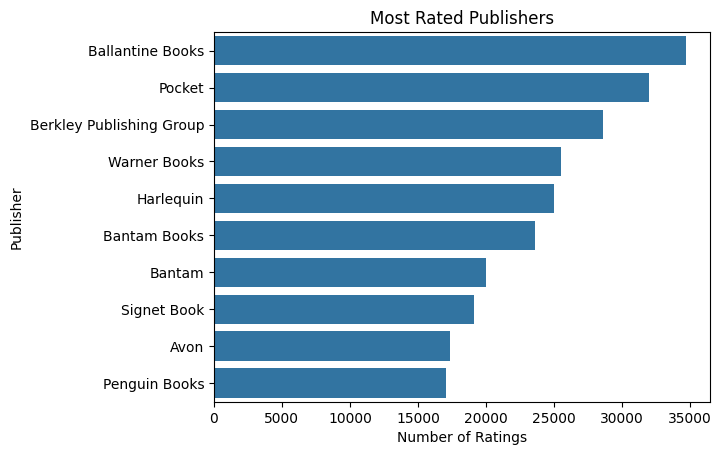

In [48]:
ratings_books = ratings.merge(books[['ISBN', 'Publisher']], on='ISBN')
publisher_counts = ratings_books['Publisher'].value_counts().head(10)

sns.barplot(x=publisher_counts.values, y=publisher_counts.index)
plt.title("Most Rated Publishers")
plt.xlabel("Number of Ratings")
plt.show()

In [49]:
merged = ratings.merge(books, on='ISBN')
book_stats = merged.groupby('Book-Title')['Book-Rating'].agg(['mean', 'count']).reset_index()
book_stats.columns = ['Title', 'AverageRating', 'RatingCount']

# Filter by high rating and low count
outliers = book_stats[(book_stats['AverageRating'] > 9.5) & (book_stats['RatingCount'] < 5)]
print("Books with high average ratings but low rating count:")
print(outliers)

Books with high average ratings but low rating count:
                                                    Title  AverageRating  \
6                                            Dark Justice           10.0   
59                      'California Historical Landmarks'           10.0   
64      'Isms: a dictionary of words ending in -ism, -...           10.0   
74                      'Round the Corner (Sister Circle)           10.0   
119                     006781: Bk.1 Gags De Boule Et Bil           10.0   
...                                                   ...            ...   
240972                                    fÃ?Â¼nfter sein           10.0   
241020                                    touch the flame           10.0   
241035  Ã? sucesso solo 50 anni fa: Lo sterminio di se...           10.0   
241047                                              Ã?Â?a           10.0   
241059  Ã?Â?berallnie. AusgewÃ?Â¤hlte Gedichte 1928 - ...           10.0   

        RatingCount  
6          

<ipython-input-50-2efa603aa435>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Book-Title', x='std', data=controversial, palette='rocket')


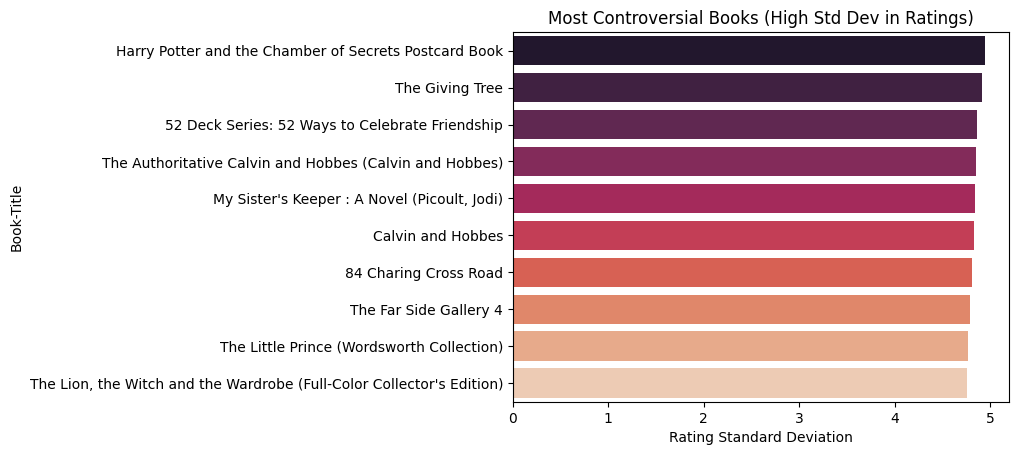

In [50]:
book_variability = ratings.groupby('ISBN')['Book-Rating'].agg(['mean', 'std', 'count']).reset_index()
book_variability = book_variability.merge(books[['ISBN', 'Book-Title']], on='ISBN')

# Highly rated but controversial books
controversial = book_variability[(book_variability['count'] > 30) & (book_variability['std'] > 2)]
controversial = controversial.sort_values(by='std', ascending=False).head(10)

sns.barplot(y='Book-Title', x='std', data=controversial, palette='rocket')
plt.title("Most Controversial Books (High Std Dev in Ratings)")
plt.xlabel("Rating Standard Deviation")
plt.show()

In [51]:
import pandas as pd
import numpy as np
import scipy.sparse as sp
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import random, time, warnings

"""
Book‑Crossing Recommender – FULL PIPELINE (Merged Data)
======================================================
This script:
 1. Loads **Books.csv**, **Users.csv**, **Ratings.csv**
 2. Merges them into a single dataframe (`combined_df`)
 3. Filters cold‑start users/items (≥ MIN_*_RATINGS)
 4. Splits into train / test (user‑stratified)
 5. Builds four recommenders:
      • Popularity‑based (most rated / "most searched")
      • User‑based collaborative filtering
      • Item‑based collaborative filtering
      • Content‑based (TF‑IDF on book metadata)
 6. Provides helper functions:
      recommend_popularity(), recommend_user_cf(),
      recommend_item_cf(), recommend_content()
 7. Prints demo recommendations.

You can import these functions elsewhere (e.g. in **app.py**).
"""

warnings.filterwarnings("ignore")

# ----------------------- CONFIG ------------------------
# DATA_DIR           = "/mnt/data"   # folder containing CSVs - Removed as files are likely in the current directory
MIN_USER_RATINGS   = 20             # cold‑start threshold for users
MIN_ITEM_RATINGS   = 20             # cold‑start threshold for books
TEST_SIZE          = 0.20           # 80/20 split
RANDOM_STATE       = 42
TOP_N              = 10             # default length of rec list

# ----------------------- LOAD --------------------------
start = time.time()

print("📥  Loading data …")
# Load files from the current directory
ratings = pd.read_csv("Ratings.csv", encoding="latin-1")
books   = pd.read_csv("Books.csv",   encoding="latin-1")
users   = pd.read_csv("Users.csv",   encoding="latin-1")

# Keep only explicit ratings ( > 0 )
ratings = ratings[ratings["Book-Rating"] > 0]

# ---------------------- MERGE --------------------------
print("🔗  Merging Ratings ⇢ Books ⇢ Users …")
combined_df = (
    ratings.merge(books, on="ISBN", how="inner")
           .merge(users, on="User-ID", how="inner")
)

# ----------------- COLD‑START FILTER -------------------
print("🧹  Filtering cold‑start users/items …")
user_counts = combined_df["User-ID"].value_counts()
item_counts = combined_df["ISBN"].value_counts()
combined_df = combined_df[combined_df["User-ID"].isin(user_counts[user_counts >= MIN_USER_RATINGS].index)]
combined_df = combined_df[combined_df["ISBN"].isin(item_counts[item_counts >= MIN_ITEM_RATINGS].index)]
combined_df.reset_index(drop=True, inplace=True)

print(f"✔️  {combined_df.shape[0]:,} ratings | "
      f"{combined_df['User-ID'].nunique():,} users | "
      f"{combined_df['ISBN'].nunique():,} books")

# -------------- TRAIN / TEST SPLIT ---------------------
print("✂️   Creating train / test split …")
train_parts, test_parts = [], []
for uid, grp in combined_df.groupby("User-ID"):
    if len(grp) < 5:
        train_parts.append(grp)  # keep all in train if not enough data
    else:
        tr, te = train_test_split(grp, test_size=TEST_SIZE, random_state=RANDOM_STATE)
        train_parts.append(tr); test_parts.append(te)
train_df = pd.concat(train_parts).reset_index(drop=True)
test_df  = pd.concat(test_parts).reset_index(drop=True)
print(f"   Train: {train_df.shape[0]:,}  |  Test: {test_df.shape[0]:,}")

# -------------- POPULARITY MODEL ----------------------
print("🏆  Building popularity model …")
pop_scores = train_df.groupby("ISBN").size().sort_values(ascending=False)

# -------------- USER / ITEM MATRICES ------------------
print("🧩  Building user‑item matrix …")
user_item = train_df.pivot_table(index="User-ID", columns="ISBN", values="Book-Rating")
user_ids  = user_item.index.tolist()
item_ids  = user_item.columns.tolist()

ui_sparse = sp.csr_matrix(user_item.fillna(0).values)
item_user_sparse = ui_sparse.T

print("🔢  Computing cosine similarities …")
user_sim = cosine_similarity(ui_sparse)
item_sim = cosine_similarity(item_user_sparse)

# -------------- CONTENT‑BASED MODEL -------------------
print("📚  Building TF‑IDF content model …")
books_sub = books.set_index("ISBN").loc[item_ids]
meta_series = (
    books_sub["Book-Title"].fillna('')  + ' ' +
    books_sub["Book-Author"].fillna('') + ' ' +
    books_sub["Publisher"].fillna('')
)
vectorizer   = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(meta_series)
content_sim  = cosine_similarity(tfidf_matrix)

# -------------------------------------------------------
#              RECOMMENDATION FUNCTIONS
# -------------------------------------------------------

def recommend_popularity(n: int = TOP_N):
    """Return globally most‑rated (most‑searched) books."""
    return pop_scores.head(n).index.tolist()


def recommend_user_cf(user_id: int, n: int = TOP_N):
    """User‑based collaborative filtering for a given user."""
    if user_id not in user_ids:
        return []
    idx  = user_ids.index(user_id)
    sims = user_sim[idx].copy(); sims[idx] = 0  # ignore self
    scores = sims @ ui_sparse.toarray()
    already = user_item.loc[user_id].notna().values
    scores[already] = -np.inf
    top_idx = scores.argsort()[-n:][::-1]
    return [item_ids[i] for i in top_idx]


def recommend_item_cf(user_id: int, n: int = TOP_N):
    """Item‑based collaborative filtering for a given user."""
    if user_id not in user_ids:
        return []
    seen = user_item.loc[user_id].dropna()
    if seen.empty:
        return []
    scores = np.zeros(len(item_ids))
    for isbn, rating in seen.items():
        idx = item_ids.index(isbn)
        scores += item_sim[idx] * rating
    scores[[item_ids.index(i) for i in seen.index]] = -np.inf
    top_idx = scores.argsort()[-n:][::-1]
    return [item_ids[i] for i in top_idx]


def recommend_content(isbn: str, n: int = TOP_N):
    """Content‑based similar books given an ISBN."""
    if isbn not in item_ids:
        return []
    idx = item_ids.index(isbn)
    sims = content_sim[idx].copy(); sims[idx] = -np.inf
    top_idx = sims.argsort()[-n:][::-1]
    return [item_ids[i] for i in top_idx]


def book_pretty(isbn: str) -> str:
    """Return readable title for an ISBN or the ISBN itself if missing."""
    if isbn in books_sub.index:
        title = books_sub.loc[isbn]["Book-Title"]
        return f"{isbn} — {title}"[:80]
    return isbn

# -------------------- DEMO -----------------------------
if __name__ == "__main__":
    random.seed(RANDOM_STATE)
    demo_user = random.choice(user_ids)
    demo_book = random.choice(item_ids)

    print("\n================  DEMO  ================")

    print("\n▶ Popularity (Top 10 overall)")
    for b in recommend_popularity():
        print("  •", book_pretty(b))

    print(f"\n▶ User‑based CF for user {demo_user}")
    for b in recommend_user_cf(demo_user):
        print("  •", book_pretty(b))

    print(f"\n▶ Item‑based CF for user {demo_user}")
    for b in recommend_item_cf(demo_user):
        print("  •", book_pretty(b))

    print(f"\n▶ Content‑based similar to {demo_book} (\"{books_sub.loc[demo_book]['Book-Title']}\")")
    for b in recommend_content(demo_book):
        print("  •", book_pretty(b))

    print(f"\n🏁  Finished in {time.time() - start:.1f}s")

📥  Loading data …
🔗  Merging Ratings ⇢ Books ⇢ Users …
🧹  Filtering cold‑start users/items …
✔️  45,908 ratings | 3,129 users | 2,129 books
✂️   Creating train / test split …
   Train: 36,141  |  Test: 9,767
🏆  Building popularity model …
🧩  Building user‑item matrix …
🔢  Computing cosine similarities …
📚  Building TF‑IDF content model …

================  DEMO  ================

▶ Popularity (Top 10 overall)
  • 0316666343 — The Lovely Bones: A Novel
  • 0385504209 — The Da Vinci Code
  • 059035342X — Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
  • 0312195516 — The Red Tent (Bestselling Backlist)
  • 043935806X — Harry Potter and the Order of the Phoenix (Book 5)
  • 0971880107 — Wild Animus
  • 0345337662 — Interview with the Vampire
  • 0446310786 — To Kill a Mockingbird
  • 0446672211 — Where the Heart Is (Oprah's Book Club (Paperback))
  • 0142001740 — The Secret Life of Bees

▶ User‑based CF for user 234657
  • 0836218353 — Yukon Ho!
  • 0345337662 — Intervie

In [52]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


In [53]:
import joblib

In [54]:
!wget -q -O - ipv4.icanhazip.com

35.237.179.80


In [55]:
! streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴⠦⠧⠇Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.237.179.80:8501

  Stopping...
^C
